# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
c_data = pd.read_excel("candyhierarchy2017.xlsx")

<a id='wrangling'></a>
## Data Wrangling



### General Properties

# 2- show some general properties for the data 

In [2]:
c_data.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN

In [3]:
c_data.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

In [4]:
c_data.describe(include='all')

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
count,2.460000e+03,2350,2419,2376.0,2396,2360,1713,1726,1788,1502,1468,1454,1695,1772,1754,1778,1777,1782,1769,1708,1780,1717,1514,1749,1607,1756,1768,1731,1758,1637,1729,1763,1581,1726,1744,1763,1765,1766,1748,1787,1788,1782,1747,1766,1765,1434,1762,1518,1716,1515,1786,1724,1730,1774,1775,1742,1769,1735,1436,1731,1767,1772,1785,1789,1733,1731,1696,1647,1518,1736,1684,1649,1720,1716,1737,1762,1643,1750,1751,1738,1707,1781,1769,1446,1746,1684,1754,1735,1559,1770,1722,1578,1767,1752,1745,1458,1543,1746,1724,1752,1754,1752,1770,1668,1671,1637,1703,1713,1755,911,717,386,1716,9,1735,85.0,1362.0,99.0,67.0,1605
unique,NaN,2,4,106.0,128,511,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,867,685,385,2,1,2,NaN,NaN,NaN,NaN,952
top,NaN,No,Male,40.0,USA,California,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,J

In [5]:
c_data.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [6]:
c_data.count()

Internal ID                                                                               2460
Q1: GOING OUT?                                                                            2350
Q2: GENDER                                                                                2419
Q3: AGE                                                                                   2376
Q4: COUNTRY                                                                               2396
Q5: STATE, PROVINCE, COUNTY, ETC                                                          2360
Q6 | 100 Grand Bar                                                                        1713
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    1726
Q6 | Any full-sized candy bar                                                             1788
Q6 | Black Jacks                                                                          1502
Q6 | Bonkers (the candy)                          

In [7]:
c_data.shape

(2460, 120)

In [8]:
c_data.duplicated().sum()

0

# cleaning

### 4- drop all the useless columns and  rows with too much NaN , 
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN 
- rename columns for easy access

In [9]:
#rename the columns
c_data.rename(columns= {
    "Q1: GOING OUT?": 'GOING_OUT',
    "Q2: GENDER": 'GENDER',
    "Q3: AGE": 'AGE',
    "Q4: COUNTRY": 'COUNTRY',
    "Q5: STATE, PROVINCE, COUNTY, ETC": 'AREA',
    "Q6 | 100 Grand Bar": 'GRAND_BAR',
    "Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)": 'AKA_MARY_JANES',
    "Q6 | Any full-sized candy bar": 'FULL_CANDY_BAR',
    "Q6 | Black Jacks": 'BLACK_JACKA',
    "Q6 | Bonkers (the candy)": 'BONKERS_CANDY',
    "Q6 | Bonkers (the board game)": 'BONKERS_GAMES',
    "Q6 | Bottle Caps": 'BOTTLE_CAP',
    "Q6 | Box'o'Raisins": 'BOX_O_RAISINS',
    "Q6 | Broken glow stick": 'BROKEN_GLOW_STICK',
    "Q6 | Butterfinger": 'BUTTERFINGER',
    "Q6 | Cadbury Creme Eggs": 'CADBURY_CREME_EGGS',
    "Q6 | Candy Corn": 'CANDY_CORN',
    "Q6 | Candy that is clearly just the stuff given out for free at restaurants": 'FREE_CANDY',
    "Q6 | Caramellos": 'CARAMELLOS',
    "Q6 | Cash, or other forms of legal tender": 'CASH',
    "Q6 | Chardonnay": 'CHARDONNAY',
    "Q6 | Chick-o-Sticks (we don’t know what that is)": 'CHICK_O_STICKS',
    "Q6 | Chiclets": 'CHICLETS',
    "Q6 | Coffee Crisp": 'COFFE_CRISP',
    "Q6 | Creepy Religious comics/Chick Tracts": 'CREEPY_TRACTS',
    "Q6 | Dental paraphenalia": 'DENTAL_PARAPHENALIA',
    "Q6 | Dots": 'DOTS',
    "Q6 | Dove Bars": 'DOVA_BARS',
    "Q6 | Fuzzy Peaches": 'FUZZY_PEACHES',
    "Q6 | Generic Brand Acetaminophen": 'ACETAMINOPHEN',
    "Q6 | Glow sticks": 'GLOW_STICKS',
    "Q6 | Goo Goo Clusters": 'GOO_CLUSTERS',
    "Q6 | Good N' Plenty": 'GOOD_PLENTY',
    "Q6 | Gum from baseball cards": 'BASEBALL_CARDS',
    "Q6 | Gummy Bears straight up": 'GUMMY_BEARS',
    "Q6 | Hard Candy": 'HARD_CANDY',
    "Q6 | Healthy Fruit": 'healthy_fruit',
    "Q6 | Heath Bar": 'healthbar',
    "Q6 | Hershey's Dark Chocolate": 'hershey_dark_chocolate',
    "Q6 | Hershey’s Milk Chocolate": 'hershey_milk_chocolate',
    "Q6 | Hershey's Kisses": 'hershey_kisses',
    "Q6 | Hugs (actual physical hugs)": 'hugs',
    "Q6 | Jolly Rancher (bad flavor)": 'jolly_rancher_bad',
    "Q6 | Jolly Ranchers (good flavor)": 'jolly_rancher_good',
    "Q6 | JoyJoy (Mit Iodine!)": 'joy_joy',
    "Q6 | Junior Mints": 'joniour_mints',
    "Q6 | Senior Mints": 'senior_mints',
    "Q6 | Kale smoothie": 'kale_smoothie',
    "Q6 | Kinder Happy Hippo": 'kinder_happy_hippo',
    "Q6 | Kit Kat": 'kit_kat',
    "Q6 | LaffyTaffy": 'laffy_taffy',
    "Q6 | LemonHeads": 'lemon_heads',
    "Q6 | Licorice (yes black)": 'licorice_black',
    "Q6 | Licorice (not black)": 'licorice_nblack',
    "Q6 | Lindt Truffle": 'lindt_truffle',
    "Q6 | Lollipops": 'lollipops',
    "Q6 | Mars": 'mars',
    "Q6 | Maynards": 'maynards',
    "Q6 | Mike and Ike": 'mike_and_ike',
    "Q6 | Milk Duds": 'milk_duds',
    "Q6 | Milky Way": 'milky_way',
    "Q6 | Regular M&Ms": 'regular_mm',
    "Q6 | Peanut M&M’s": 'peanut_mm',
    "Q6 | Blue M&M's": 'blue_mm',
    "Q6 | Red M&M's": 'red_mm',
    "Q6 | Green Party M&M's": 'green_party_mms',
    "Q6 | Independent M&M's": 'independent_mms',
    "Q6 | Abstained from M&M'ing.": 'abstained_mm',
    "Q6 | Minibags of chips": 'minibags_chips',
    "Q6 | Mint Kisses": 'mint_kisses',
    "Q6 | Mint Juleps": 'mint_juleps',
    "Q6 | Mr. Goodbar": 'mr_goodbar',
    "Q6 | Necco Wafers": 'necco_wafers',
    "Q6 | Nerds": 'nerds',
    "Q6 | Nestle Crunch": 'nestle_crunch',
    "Q6 | Now'n'Laters": 'now_n_laters',
    "Q6 | Peeps": 'peeps',
    "Q6 | Pencils": 'pencils',
    "Q6 | Pixy Stix": 'pixy_stix',
    "Q6 | Real Housewives of Orange County Season 9 Blue-Ray": 'blue_ray',
    "Q6 | Reese’s Peanut Butter Cups": 'reese_peanut_butter_cup',
    "Q6 | Reese's Pieces": 'reese_pieces',
    "Q6 | Reggie Jackson Bar": 'reggie_jackson_bar',
    "Q6 | Rolos": 'rolos',
    "Q6 | Sandwich-sized bags filled with BooBerry Crunch": 'booberry_crunch',
    "Q6 | Skittles": 'skittles',
    "Q6 | Smarties (American)": 'american_smarties',
    "Q6 | Smarties (Commonwealth)": 'commonwelth_smarties',
    "Q6 | Snickers": 'snickers',
    "Q6 | Sourpatch Kids (i.e. abominations of nature)": 'sourpatch_kids',
    "Q6 | Spotted Dick": 'spotted_dick',
    "Q6 | Starburst": 'starburst',
    "Q6 | Sweet Tarts": 'sweet_tarts',
    "Q6 | Swedish Fish": 'swedish_fish',
    "Q6 | Sweetums (a friend to diabetes)": 'sweetums',
    "Q6 | Take 5": 'take5',
    "Q6 | Tic Tacs": 'tic_tacs',
    "Q6 | Those odd marshmallow circus peanut things": 'marshmallow_circus_peanut',
    "Q6 | Three Musketeers": 'three_musketeers',
    "Q6 | Tolberone something or other": 'tolberone_other',
    "Q6 | Trail Mix": 'trail_mix',
    "Q6 | Twix": 'twix',
    "Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein": 'Vials_fructose_corn_syrup',
    "Q6 | Vicodin": 'vicodin',
    "Q6 | Whatchamacallit Bars": 'watchamacallit_bars',
    "Q6 | White Bread": 'white_bread',
    "Q6 | Whole Wheat anything": 'whole_wheat_anything',
    "Q6 | York Peppermint Patties": 'york_peppermint_patties',
    "Q7: JOY OTHER": 'other_joy',
    "Q8: DESPAIR OTHER": 'other_despair',
    "Q9: OTHER COMMENTS": 'other_commemts',
    "Q10: DRESS": "dress",
    "Q11: DAY": 'day',
    "Q12: MEDIA [Daily Dish]": "media_daily_dish",
    "Q12: MEDIA [Science]": "media_science",
    "Q12: MEDIA [ESPN]": "media_espn",
    "Q12: MEDIA [Yahoo]": "media_yahoo",
    "Click Coordinates (x, y)": "X_Y",
}, inplace=True)

In [10]:
c_data.drop(columns=['Internal ID','Unnamed: 113','X_Y'],axis=1,inplace=True)

In [11]:
#columns have alot of missing value
c_data.drop(columns=['media_daily_dish','media_science','media_espn','media_yahoo'], axis=1 , inplace=True)

In [12]:
#how=all : drop the rows where all elements are missing
c_data.dropna(axis=0, how='all', inplace=True)

In [13]:
#thresh=20 :Keep only the rows with at least 20 non-NA values
c_data.dropna(axis=0, thresh=20, inplace=True)

In [14]:
c_data.head()

,GOING_OUT,GENDER,AGE,COUNTRY,AREA,GRAND_BAR,AKA_MARY_JANES,FULL_CANDY_BAR,BLACK_JACKA,BONKERS_CANDY,BONKERS_GAMES,BOTTLE_CAP,BOX_O_RAISINS,BROKEN_GLOW_STICK,BUTTERFINGER,CADBURY_CREME_EGGS,CANDY_CORN,FREE_CANDY,CARAMELLOS,CASH,CHARDONNAY,CHICK_O_STICKS,CHICLETS,COFFE_CRISP,CREEPY_TRACTS,DENTAL_PARAPHENALIA,DOTS,DOVA_BARS,FUZZY_PEACHES,ACETAMINOPHEN,GLOW_STICKS,GOO_CLUSTERS,GOOD_PLENTY,BASEBALL_CARDS,GUMMY_BEARS,HARD_CANDY,healthy_fruit,healthbar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mms,independent_mms,abstained_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,blue_ray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,Vials_fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties,other_joy,other_despair,other_commemts,dress,day
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,Sunday
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,White and gold,Sunday
4,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,White and gold,Friday
5,No,Male,NaN,NaN,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,MEH,MEH,JOY,NaN,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,MEH,JOY,JOY,MEH,MEH,MEH,MEH,MEH,NaN,JOY,NaN,DESPAIR,NaN,JOY,MEH,MEH,MEH,MEH,JOY,MEH,JOY,NaN,JOY,JOY,JOY,JOY,JOY,JOY,JOY,NaN,NaN,NaN,JOY,JOY,JOY,JOY,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,MEH,MEH,NaN,NaN,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,NaN,NaN
7,No,Male,33,cana

In [15]:
c_data.shape

(1797, 113)

In [16]:
c_data.isnull().sum().sort_values(ascending=False)


other_commemts               1413
other_despair                1081
other_joy                     887
joy_joy                       363
maynards                      361
reggie_jackson_bar            351
BONKERS_GAMES                 344
sweetums                      339
BONKERS_CANDY                 330
BLACK_JACKA                   297
CHICK_O_STICKS                283
kinder_happy_hippo            282
abstained_mm                  279
senior_mints                  279
take5                         254
commonwelth_smarties          238
spotted_dick                  219
GOO_CLUSTERS                  217
COFFE_CRISP                   190
FUZZY_PEACHES                 160
watchamacallit_bars           160
now_n_laters                  154
independent_mms               150
mint_juleps                   148
Vials_fructose_corn_syrup     129
vicodin                       126
mint_kisses                   113
booberry_crunch               113
BOTTLE_CAP                    103
green_party_mm

### 5 - clean `going out` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [17]:
c_data['GOING_OUT'].describe()

count     1734
unique       2
top         No
freq      1497
Name: GOING_OUT, dtype: object

In [18]:
c_data['GOING_OUT'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
c_data['GOING_OUT'].isnull().sum()

63

In [20]:
c_data['GOING_OUT']=c_data['GOING_OUT'].fillna('No')


In [21]:
c_data['GOING_OUT'].isnull().sum()

0

In [22]:
c_data['GOING_OUT'].unique()

array(['No', 'Yes'], dtype=object)

### 6 - clean ` gender` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [23]:
c_data['GOING_OUT'].describe()

count     1797
unique       2
top         No
freq      1560
Name: GOING_OUT, dtype: object

In [24]:
c_data['GENDER'].unique()

array(['Male', 'Female', "I'd rather not say", 'Other', nan], dtype=object)

In [25]:
c_data['GENDER'].value_counts()

Male                  1082
Female                 618
I'd rather not say      61
Other                   26
Name: GENDER, dtype: int64

In [26]:
c_data['GENDER'].isnull().sum()

10

In [27]:
c_data['GENDER']=c_data['GENDER'].fillna("Male")

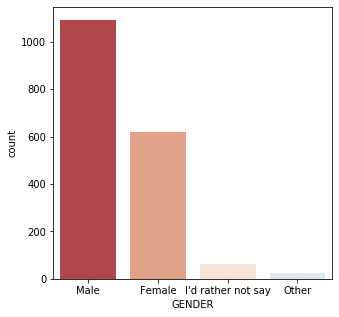

In [28]:
plt.figure(figsize=(5,5))
sns.set_palette("RdBu")
sns.countplot(c_data['GENDER'])
plt.show()

In [29]:
c_data['GENDER'].isnull().sum()

0

### 7 - clean ` age` column 
> tip : note the type of age column , and NaN values
 - try to use `to_numeric` 
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [30]:
c_data['AGE'].unique()

array([44, 40, 23, nan, 33, 53, 56, 64, 43, 37, 59, 48, 45, 49, 34, 35,
       38, 58, 50, 47, 52, 63, 65, 41, 31, 61, 46, 54, 62, 29, 42, 39, 36,
       32, 28, 69, 67, 30, 25, 22, 51, 70, 24, 27, 18, 19, 'Old enough',
       57, 66, 12, 'Many', 60, 55, '?', 21, 11, 'no', 68, 20, 6, 10, 71,
       90, 13, 26, '45-55', 312, 72, 99, 'hahahahaha', 9, 88, 74, 102,
       'older than dirt', 15, 8, 75, 17, 'Enough', 'See question 2',
       '24-50', 7, 14, 'Over 50', 76, 100, 1000, 16, '46 Halloweens.',
       'ancient', 77, 'OLD', 'old', 'MY NAME JEFF', 4, 73, 'old enough',
       'I can remember when Java was a cool new language'], dtype=object)

In [31]:
c_data['AGE'] = c_data['AGE'].replace({"Many": np.nan, "?": np.nan, "Old enough": np.nan, 'hahahahaha': np.nan,
          "older than dirt": np.nan,"Enough":np.nan, "See question 2" : np.nan, "Over 50": np.nan ,"46 Halloweens.": np.nan ,"OLD": np.nan ,"old": np.nan ,"old enough": np.nan , "MY NAME JEFF" : np.nan, "I can remember when Java was a cool new language" : np.nan,  "ancient" : np.nan,  "no" : np.nan,  "45-55" : np.nan,  "24-50" : np.nan })

In [32]:
c_data['AGE'].unique()

array([  44.,   40.,   23.,   nan,   33.,   53.,   56.,   64.,   43.,
         37.,   59.,   48.,   45.,   49.,   34.,   35.,   38.,   58.,
         50.,   47.,   52.,   63.,   65.,   41.,   31.,   61.,   46.,
         54.,   62.,   29.,   42.,   39.,   36.,   32.,   28.,   69.,
         67.,   30.,   25.,   22.,   51.,   70.,   24.,   27.,   18.,
         19.,   57.,   66.,   12.,   60.,   55.,   21.,   11.,   68.,
         20.,    6.,   10.,   71.,   90.,   13.,   26.,  312.,   72.,
         99.,    9.,   88.,   74.,  102.,   15.,    8.,   75.,   17.,
          7.,   14.,   76.,  100., 1000.,   16.,   77.,    4.,   73.])

In [33]:
c_data.AGE = pd.to_numeric(c_data.AGE, errors='coerce')

In [34]:
for i in c_data['AGE']:
    if(i>100):
        c_data['AGE']=c_data['AGE'].replace(i,np.nan)

In [35]:
c_data.AGE = c_data.AGE.fillna(42).astype(int)

In [36]:
c_data.AGE.describe()

count    1797.000000
mean       42.693378
std        11.758948
min         4.000000
25%        35.000000
50%        42.000000
75%        50.000000
max       100.000000
Name: AGE, dtype: float64

In [37]:
c_data.AGE.isnull().sum()

0

### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways 
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [38]:
c_data['COUNTRY'].isnull().sum()

21

In [39]:
c_data['COUNTRY'].unique()

array(['USA ', 'us', 'usa', nan, 'canada', 'Canada', 'Us', 'US', 'Murica',
       'USA', 'uk', 'United States', 'united states', 'Usa',
       'United staes', 'United Kingdom', 'United States of America',
       'UAE', 'United States ', 'England', 'canada ', 'United states',
       'u.s.a.', 'USAUSAUSA', 'america', 'france',
       'United States of America ', 'U.S.A.', 'Mexico', 'Canada ',
       'united states of america', 'US of A', 'UK', 'Unites States',
       'The United States', 'North Carolina ', 'Netherlands', 'Europe',
       'Earth', 'U S', 'u.s.', 'Costa Rica',
       'The United States of America', 'cascadia', 'insanity lately',
       'Greece', 'USA? Hard to tell anymore..', "'merica", 'Pittsburgh',
       'United State', 'France', 'U.S.', 'A', 'Can', 'Canae', 'New York',
       'Trumpistan', 'Ireland', 'United Sates', 'Korea', 'Australia',
       'California', 'Japan', 'USa',
       'I pretend to be from Canada, but I am really from the United States.',
       'Usa ', 'I

In [40]:
c_data['COUNTRY']=c_data['COUNTRY'].replace({'USA? Hard to tell anymore..':np.nan, 'subscribe to dm4uz3 on youtube':np.nan,
      'USA USA USA!!!!':np.nan,'Ahem....Amerca':np.nan, "I don't know anymore":np.nan,"I pretend to be from Canada, but I am really from the United States.":np.nan})

In [41]:
c_data['COUNTRY'].unique()

array(['USA ', 'us', 'usa', nan, 'canada', 'Canada', 'Us', 'US', 'Murica',
       'USA', 'uk', 'United States', 'united states', 'Usa',
       'United staes', 'United Kingdom', 'United States of America',
       'UAE', 'United States ', 'England', 'canada ', 'United states',
       'u.s.a.', 'USAUSAUSA', 'america', 'france',
       'United States of America ', 'U.S.A.', 'Mexico', 'Canada ',
       'united states of america', 'US of A', 'UK', 'Unites States',
       'The United States', 'North Carolina ', 'Netherlands', 'Europe',
       'Earth', 'U S', 'u.s.', 'Costa Rica',
       'The United States of America', 'cascadia', 'insanity lately',
       'Greece', "'merica", 'Pittsburgh', 'United State', 'France',
       'U.S.', 'A', 'Can', 'Canae', 'New York', 'Trumpistan', 'Ireland',
       'United Sates', 'Korea', 'Australia', 'California', 'Japan', 'USa',
       'Usa ', 'Iceland', 'Canada`', 'Scotland', 'Denmark', 'France ',
       'Uk', 'Switzerland', 'South Korea', 'New Jersey', 'CANAD

In [42]:
c_data['COUNTRY']=c_data['COUNTRY'].fillna('other country')

In [43]:
c_data['COUNTRY']=c_data['COUNTRY'].str.upper()

In [44]:
c_data['COUNTRY']=c_data['COUNTRY'].replace(['United States','America','AMERICA',"'MERICA",'A','MURICA','MURRIKA','N. AMERICA','New York','MEXICO','CALIFORNIA','NEW JERSEY','U.S.A.','US OF A','U S A'],'USA')
c_data['COUNTRY']=c_data['COUNTRY'].replace(['UNITED KINGDOM','ENGLAND','ENDLAND'],'UK')
c_data['COUNTRY']=c_data['COUNTRY'].replace(['CANADA'],'CANADA')

In [45]:
for i in c_data['COUNTRY']:
    if ((('U' in str(i) and 'S' in str (i)))):
        c_data['COUNTRY']=c_data['COUNTRY'].replace(i,"USA")

In [46]:
c_data['COUNTRY'].value_counts()

USA                  1544
CANADA                151
OTHER COUNTRY          27
UK                     20
GERMANY                 7
CANADA                  6
NETHERLANDS             4
IRELAND                 3
SCOTLAND                3
JAPAN                   3
DENMARK                 2
SWITZERLAND             2
FRANCE                  2
GREECE                  1
CASCADIA                1
NEW YORK                1
TAIWAN                  1
COSTA RICA              1
CANAE                   1
EUROPE                  1
FEAR AND LOATHING       1
NARNIA                  1
KOREA                   1
NORTH CAROLINA          1
ALASKA                  1
CAN                     1
FRANCE                  1
CANADA`                 1
SINGAPORE               1
ATLANTIS                1
SPAIN                   1
INSANITY LATELY         1
UAE                     1
EARTH                   1
CHINA                   1
ICELAND                 1
Name: COUNTRY, dtype: int64

### 9 - clean ` area` column
> tip : area column has the same problem as country columns , but looking at all it's unique values may give us another way to deal with it rather than try to fix it

In [47]:
c_data['AREA'].unique()

array(['NM', 'or', 'exton pa', nan, 'ontario', 'Ontario', 'Wa', 'Quebec',
       'NY', 'California', 'Texas', 'NEW YORK', 'CO', 'aberdeenshire',
       'Alberta', 'Wisconsin, 53705', 'RI', 'minnesota', 'Michigan',
       'Florida', 'New Jersey', 'Colorado', 'Los Angeles, California',
       'CA', 'Chicago, Illinois', 'Wisconsin', 'Minnesota ', 'London',
       'mn', 'TEXAS', 'District of Columbia', 'Washington',
       'Massachusetts ', 'OR', 'Illinois', 'New York', 'massachusetts',
       'Abu Dhabi', 'TX', 'Dc', 'VA', 'MN', 'yukon', 'Pennsylvania ',
       'MD', 'Virginia', 'Alberta ', 'OXFORDSHIRE', 'DC', 'Iowa', 'Mn',
       'TN', 'Ohio', 'BC', 'Maryland', 'MI', 'Wisconsin ', 'Ny',
       'Colorado, Jefferson county ', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska ', 'Oregon', 'UT', 'ny',
       'Pennsylvania', 'north carolina', 'Tennessee ',
       'Knox county, Tennessee', 'New Mexico', 'Maine', 'maine',
       'Virginia, Arlington', 'WA', 'Illinois ', 'Il', 'New Hamp

In [48]:
# كتير وانا زهقت لغتهم جدعنه مني 
c_data.drop('AREA',axis=1,inplace=True)

### 10 - clean ` Q6` columns
>- tip : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [49]:
c_data.iloc[:,4:-5]

,GRAND_BAR,AKA_MARY_JANES,FULL_CANDY_BAR,BLACK_JACKA,BONKERS_CANDY,BONKERS_GAMES,BOTTLE_CAP,BOX_O_RAISINS,BROKEN_GLOW_STICK,BUTTERFINGER,CADBURY_CREME_EGGS,CANDY_CORN,FREE_CANDY,CARAMELLOS,CASH,CHARDONNAY,CHICK_O_STICKS,CHICLETS,COFFE_CRISP,CREEPY_TRACTS,DENTAL_PARAPHENALIA,DOTS,DOVA_BARS,FUZZY_PEACHES,ACETAMINOPHEN,GLOW_STICKS,GOO_CLUSTERS,GOOD_PLENTY,BASEBALL_CARDS,GUMMY_BEARS,HARD_CANDY,healthy_fruit,healthbar,hershey_dark_chocolate,hershey_milk_chocolate,hershey_kisses,hugs,jolly_rancher_bad,jolly_rancher_good,joy_joy,joniour_mints,senior_mints,kale_smoothie,kinder_happy_hippo,kit_kat,laffy_taffy,lemon_heads,licorice_nblack,licorice_black,lindt_truffle,lollipops,mars,maynards,mike_and_ike,milk_duds,milky_way,regular_mm,peanut_mm,blue_mm,red_mm,green_party_mms,independent_mms,abstained_mm,minibags_chips,mint_kisses,mint_juleps,mr_goodbar,necco_wafers,nerds,nestle_crunch,now_n_laters,peeps,pencils,pixy_stix,blue_ray,reese_peanut_butter_cup,reese_pieces,reggie_jackson_bar,rolos,booberry_crunch,skittles,american_smarties,commonwelth_smarties,snickers,sourpatch_kids,spotted_dick,starburst,sweet_tarts,swedish_fish,sweetums,take5,tic_tacs,marshmallow_circus_peanut,three_musketeers,tolberone_other,trail_mix,twix,Vials_fructose_corn_syrup,vicodin,watchamacallit_bars,white_bread,whole_wheat_anything,york_peppermint_patties
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
5,JOY,DESPAIR,JOY,NaN,NaN,NaN,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,MEH,MEH,JOY,NaN,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,MEH,JOY,JOY,MEH,MEH,MEH,MEH,MEH,NaN,JOY,NaN,DESPAIR,NaN,JOY,MEH,MEH,MEH,MEH,JOY,MEH,JOY,NaN,JOY,JOY,JOY,JOY,JOY,JOY,JOY,NaN,NaN,NaN,JOY,JOY,JOY,JOY,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,MEH,MEH,NaN,NaN,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY
7,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,DES

In [50]:
c_data.iloc[:,4:-5].isnull().sum()

GRAND_BAR                     87
AKA_MARY_JANES                74
FULL_CANDY_BAR                12
BLACK_JACKA                  297
BONKERS_CANDY                330
BONKERS_GAMES                344
BOTTLE_CAP                   103
BOX_O_RAISINS                 26
BROKEN_GLOW_STICK             44
BUTTERFINGER                  20
CADBURY_CREME_EGGS            20
CANDY_CORN                    15
FREE_CANDY                    28
CARAMELLOS                    89
CASH                          17
CHARDONNAY                    80
CHICK_O_STICKS               283
CHICLETS                      48
COFFE_CRISP                  190
CREEPY_TRACTS                 41
DENTAL_PARAPHENALIA           29
DOTS                          66
DOVA_BARS                     39
FUZZY_PEACHES                160
ACETAMINOPHEN                 68
GLOW_STICKS                   34
GOO_CLUSTERS                 217
GOOD_PLENTY                   71
BASEBALL_CARDS                53
GUMMY_BEARS                   34
          

In [51]:
Q6=(c_data.iloc[:,4:-5].isnull()).columns

In [52]:
Q6

Index(['GRAND_BAR', 'AKA_MARY_JANES', 'FULL_CANDY_BAR', 'BLACK_JACKA',
       'BONKERS_CANDY', 'BONKERS_GAMES', 'BOTTLE_CAP', 'BOX_O_RAISINS',
       'BROKEN_GLOW_STICK', 'BUTTERFINGER',
       ...
       'three_musketeers', 'tolberone_other', 'trail_mix', 'twix',
       'Vials_fructose_corn_syrup', 'vicodin', 'watchamacallit_bars',
       'white_bread', 'whole_wheat_anything', 'york_peppermint_patties'],
      dtype='object', length=103)

In [53]:
#idxmax() : to return the index for the maximum value in each column
for columns in Q6 :
    most_freq=c_data[columns].value_counts().idxmax()
    c_data[columns].replace(np.nan,most_freq,inplace=True)


In [54]:
c_data.iloc[:,4:-5].isnull().sum()

GRAND_BAR                    0
AKA_MARY_JANES               0
FULL_CANDY_BAR               0
BLACK_JACKA                  0
BONKERS_CANDY                0
BONKERS_GAMES                0
BOTTLE_CAP                   0
BOX_O_RAISINS                0
BROKEN_GLOW_STICK            0
BUTTERFINGER                 0
CADBURY_CREME_EGGS           0
CANDY_CORN                   0
FREE_CANDY                   0
CARAMELLOS                   0
CASH                         0
CHARDONNAY                   0
CHICK_O_STICKS               0
CHICLETS                     0
COFFE_CRISP                  0
CREEPY_TRACTS                0
DENTAL_PARAPHENALIA          0
DOTS                         0
DOVA_BARS                    0
FUZZY_PEACHES                0
ACETAMINOPHEN                0
GLOW_STICKS                  0
GOO_CLUSTERS                 0
GOOD_PLENTY                  0
BASEBALL_CARDS               0
GUMMY_BEARS                  0
                            ..
pixy_stix                    0
blue_ray

### 11 - clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [55]:
c_data['dress'].isnull().sum()

86

In [61]:
c_data['dress'].value_counts()

White and gold    1163
Blue and black     634
Name: dress, dtype: int64

In [56]:
most_freq = c_data['dress'].value_counts().idxmax()

In [57]:
c_data['dress'].fillna(most_freq,inplace=True)

In [58]:
c_data['dress'].isnull().sum()

0

### 12 - clean ` day` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [60]:
c_data['day'].isnull().sum()

66

In [62]:
c_data['day'].value_counts()

Friday    1090
Sunday     641
Name: day, dtype: int64

In [63]:
most_freq = c_data['day'].value_counts().idxmax()

In [64]:
c_data['day'].fillna(most_freq,inplace=True)

In [65]:
c_data['day'].isnull().sum()

0

### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values 
- all the column are cleaing and ready for the next step `EDA`

### 14 - write a summary about all the cleaning steps 